# Unsupervised Learning
## Car mpg

The dataset was used in the 1983 American Statistical Association Exposition. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multivalued discrete and 4 continuous variables. 

Dataset: cars-dataset.csv

### Attribute Information:

Car Name – Name of the car

Cyl – No of cylinders in the car – Multivalued discrete

Disp – Displacement – continuous

Hp – Horsepower – continuous

Wt – Weight – continuous

Acc – Accleration – continuous

Yr – Model of the car – Multivalued discrete

### Steps to follow:

1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points
2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points
3. Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)
4. Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.metrics import r2_score

from sklearn.cluster import KMeans

from sklearn import metrics

from sklearn import preprocessing

In [2]:
df = pd.read_csv("cars-dataset.csv")
df.shape

(398, 8)

### STEP 1

- EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

<HTML>
    <FONT color = Darkblue>
        <b>Do following for EDA & Pre-processing</b><br>
    </FONT>
</HTML>

- Imputation of null values
- Imputation of non-numeric values with numeric values in numeric columns
- Study using head(), describe(), info(), nunique()
- Univariate analysis
    - Box plot
        - Example:
            - plt.figure(figsize=[7,7])
              df.boxplot(["ColumnA", "ColumnB", "ColumnC"])
    - Histogram
        - Example:
            - df.hist(figsize=[15,15])
            - temp = df[df["TargetColumn"] == 0]
              temp.hist(figsize=[15,15])
            - df.groupby("status")["ColumnA"].hist(alpha=0.4, figsize=[7,7])
- Bivariat analysis
    - Correlation study
        - Call the corr() to get the DataFrame containing the correlation values between various columns
        - Create a method to loop through all these columns and find the columns exceeding the threshold correlation value
            - Example: Check function correlationThresholdCutter() implementation below
    - Scatter plot
        - Example:
            - sns.scatterplot(df["ColumnaX"], df["ColumnY"])
- Write observations/inferences from all above analysis

<HTML>
    <FONT color = Darkblue>
        <b>Imputation of null values</b><br>
        <b>Imputation of non-numeric values with numeric values in numeric columns</b><br>
    </FONT>
</HTML>

In [3]:
df.head()

# total 8 columns

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [4]:
df.describe().T

# Only 6 columns identify themselves with numeric type

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [5]:
df.describe(include="all").T

# hp column not showing 5 pointer summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
car name,398,305,ford pinto,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cyl,398,NaN,NaN,NaN,5.45477,1.701,3,4,4,8,8
disp,398,NaN,NaN,NaN,193.426,104.27,68,104.25,148.5,262,455
hp,398,94,150,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wt,398,NaN,NaN,NaN,2970.42,846.842,1613,2223.75,2803.5,3608,5140
acc,398,NaN,NaN,NaN,15.5681,2.75769,8,13.825,15.5,17.175,24.8
yr,398,NaN,NaN,NaN,76.0101,3.69763,70,73,76,79,82
mpg,398,NaN,NaN,NaN,23.5146,7.81598,9,17.5,23,29,46.6


In [6]:
df.info()

# hp column classified as object instead of a numericdf.describe(include=['object'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [7]:
df.describe(include=['object'])

,car name,hp
count,398,398
unique,305,94
top,ford pinto,150
freq,6,22


<HTML>
    <FONT color = green>
        Upon checking the data source (csv file) it is fould, that, the column hp contains few rows with value '<b>?</b>'. Next, we will attempt to replace these values with some numeric value.<br>
    </FONT>
</HTML>

#### Create a new data set
    - In the new data set remove the 'car name' column
    - Alternately the 'car name' can be replaced by the car company name. This can then, act as a nominal column
        - Apply dummy, if using this approach

In [8]:
# Break the 'car name' column to get brand and model
def breakNameColumn(df_input, dropModel):
    #
    df_input["brand"] = df_input["car name"].str.split(" ").str[:1].apply(lambda parts: " ".join(parts))
    # print("Unique values in subjectId_recordingNumber: ", df_input["subjectId_recordingNumber"].nunique())
    df_input["model"] = df_input["car name"].str.split(" ").str[1:].apply(lambda parts: " ".join(parts))

    # Drop the name column
    df_input.drop("car name", axis=1, inplace=True)
    
    # Change data type of recordingNumber
    # df_input["recordingNumber"] = pd.to_numeric(df_input["recordingNumber"])

    # Reorder the columns. Bring the columns derived from name at the start
    df_input = df_input.reindex(columns=["brand", "model"] + list(df_input.columns[:-2]))
    
    # If dropModel is True, then, drop the "model" column
    if dropModel:
        df_input.drop("model", axis=1, inplace=True)
    
    #print(df_input.head())
    
    return df_input

In [9]:
# Dummify the brand column
def brandDumming(df_in):
    # Call breakNameColumn() to create brand column
    df_in = breakNameColumn(df_in, True)
    
    # Apply dummy on "brand" column
    df_brand_dummies = pd.get_dummies(df_in.brand)
    
    # Combine following pairs of brands
        # chevroelt, chevrolet
        # maxda, mazda
        # mercedes, mercedes-benz
        # toyota, toyouta
        # vokswagen, volkswagen, vw
    df_brand_dummies["chevroelt_2"] = df_brand_dummies.chevroelt + df_brand_dummies.chevrolet
    df_brand_dummies["maxda_2"] = df_brand_dummies.maxda + df_brand_dummies.mazda
    df_brand_dummies["mercedes_2"] = df_brand_dummies.mercedes + df_brand_dummies["mercedes-benz"]
    df_brand_dummies["toyota_2"] = df_brand_dummies.toyota + df_brand_dummies.toyouta
    df_brand_dummies["volkswagen_2"] = df_brand_dummies.volkswagen + df_brand_dummies.vokswagen + df_brand_dummies.vw
    
    df_brand_dummies.drop(["chevroelt", "chevrolet", "maxda", "mazda", "mercedes", "mercedes-benz", "toyota", "toyouta",
                          "vokswagen", "volkswagen", "vw"], axis=1, inplace=True)
    
    # Concat the dummy columns with the incoming data
    df_out = pd.concat([df_in, df_brand_dummies], axis=1)
    df_out.drop("brand", axis=1, inplace=True)
    
    return df_out

In [10]:
# 
#df = pd.read_csv("cars-dataset.csv")
#df.shape

In [11]:
# Process "car name" column
    # Seperate the brands
    # Apply dummies on brands

df = brandDumming(df)

#df.info()

- check the sum in the dummies columns. This will tell how many records exist in each type.
    - df_brand_dummies.sum()


- Later, if possible, test with combined brands for all columns with sum less than, say 5, in one brand

In [12]:
# Check what kind of values exist after dummying
df.head()

,cyl,disp,hp,wt,acc,yr,mpg,amc,audi,bmw,...,renault,saab,subaru,triumph,volvo,chevroelt_2,maxda_2,mercedes_2,toyota_2,volkswagen_2
0,8,307.0,130,3504,12.0,70,18.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,8,350.0,165,3693,11.5,70,15.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,318.0,150,3436,11.0,70,18.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,304.0,150,3433,12.0,70,16.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,302.0,140,3449,10.5,70,17.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Apply linearRegression to find the possible value for hp
- Seperate the rows containing non-numeric value in hp. Lets call it missing_hp_df.
- Divide the remaining data set into train and test sets
- Do linearRegression modelling, with hp as the target
- Use the model to predict the hp values for entries in missing_hp_df.

In [13]:
# from sklearn import linear_model
# from sklearn.metrics import r2_score

def hpPred(df_in):
    
    # Speerate the rows containing non-numeric value in hp
    
    df_in["isHpNumeric"] = df_in.hp.str.isnumeric()
    # Seperate rows with numeric value in "hp" from rows without numeric value in "hp"
    missing_hp_df = df_in[df_in.isHpNumeric == False]
    valid_hp_df = df_in[df_in.isHpNumeric == True]
    # Convert hp column to numeric in the df with numeric values in the column
    valid_hp_df.hp = pd.to_numeric(valid_hp_df.hp)
    # Drop hp "isHpNumeric" column
    missing_hp_df.drop("isHpNumeric", axis=1, inplace=True)
    valid_hp_df.drop("isHpNumeric", axis=1, inplace=True)
    
    # Create test and train data set for model building
    
    X = valid_hp_df.drop("hp", axis=1)
    Y = valid_hp_df.hp
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)
    
    # Build the model to predict hp
    
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    # r-squared
    r2 = r2_score(y_test, y_pred)
    # Adjusted r-squared
    ad_r2 = 1 - (1 - r2) * (len(y_train) - 1) / (len(y_train) - X.shape[1] - 1)
    print("R squared for the linear regression: ", r2)
    print("Adjusted R squared: ", ad_r2)
    
    # Predict the hp values, in the missing hp rows
    
    missingHp = regr.predict(missing_hp_df.drop("hp", axis=1))
    missing_hp_df.hp = pd.to_numeric(missingHp)
    # Change the hp column from float to int
    missing_hp_df.hp = missing_hp_df.hp.apply(np.int8)
    #missing_hp_df
    
    #
    # Combine the predicted rows with other rows
    # Concat the rows (axis = 0)
    df_out = pd.concat([missing_hp_df, valid_hp_df], axis=0)
    df_out.head()
    
    return df_out

In [14]:
df = hpPred(df)
df.head()

R squared for the linear regression:  0.9195160607029873
Adjusted R squared:  0.9068978159826929


,cyl,disp,hp,wt,acc,yr,mpg,amc,audi,bmw,...,renault,saab,subaru,triumph,volvo,chevroelt_2,maxda_2,mercedes_2,toyota_2,volkswagen_2
32,4,98.0,55,2046,19.0,71,25.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126,6,200.0,90,2875,17.0,74,21.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
330,4,85.0,60,1835,17.3,80,40.9,0,0,0,...,1,0,0,0,0,0,0,0,0,0
336,4,140.0,94,2905,14.3,80,23.6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
354,4,100.0,78,2320,15.8,81,34.5,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [15]:
#
#df = pd.read_csv("cars-dataset.csv")
#df = brandDumming(df)
#df = hpPred(df)

<HTML>
    <FONT color = Darkblue>
        <b>Study using head(), describe(), info(), nunique()</b><br>
    </FONT>
</HTML>

In [16]:
df.nunique()

cyl               5
disp             82
hp               94
wt              351
acc              95
yr               13
mpg             129
amc               2
audi              2
bmw               2
buick             2
cadillac          2
capri             2
chevy             2
chrysler          2
datsun            2
dodge             2
fiat              2
ford              2
hi                2
honda             2
mercury           2
nissan            2
oldsmobile        2
opel              2
peugeot           2
plymouth          2
pontiac           2
renault           2
saab              2
subaru            2
triumph           2
volvo             2
chevroelt_2       2
maxda_2           2
mercedes_2        2
toyota_2          2
volkswagen_2      2
dtype: int64

<HTML>
    <FONT color = Darkblue>
        <b>Univariate analysis: Box plot</b><br>
    </FONT>
</HTML>

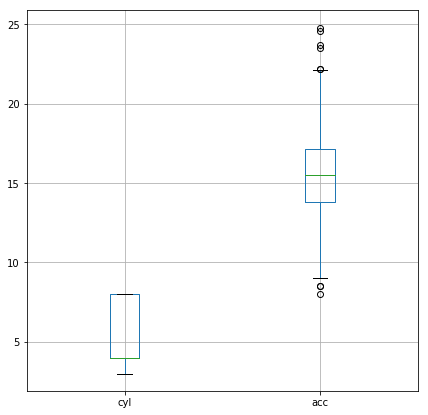

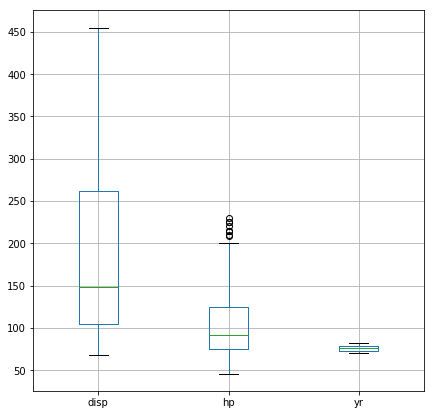

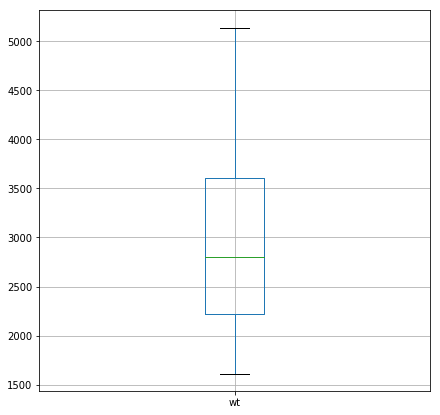

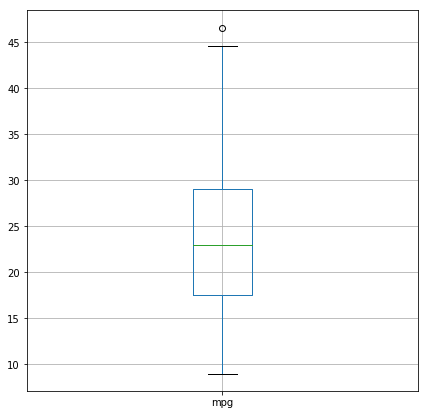

In [17]:
plt.figure(figsize=[7,7])
df.boxplot(["cyl", "acc"])

plt.figure(figsize=[7,7])
df.boxplot(["disp", "hp", "yr"])

plt.figure(figsize=[7,7])
df.boxplot(["wt"])

plt.figure(figsize=[7,7])
df.boxplot(["mpg"])

<HTML>
    <FONT color = green>
        There are outliers in<br>
        <ul>
            <li>acc</li>
            <li>hp</li>
        </ul>
    </FONT>
</HTML>

<HTML>
    <FONT color = Darkblue>
        <b>Univariate analysis: Histogram</b><br>
    </FONT>
</HTML>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B263D34048>,
      dtype=object)

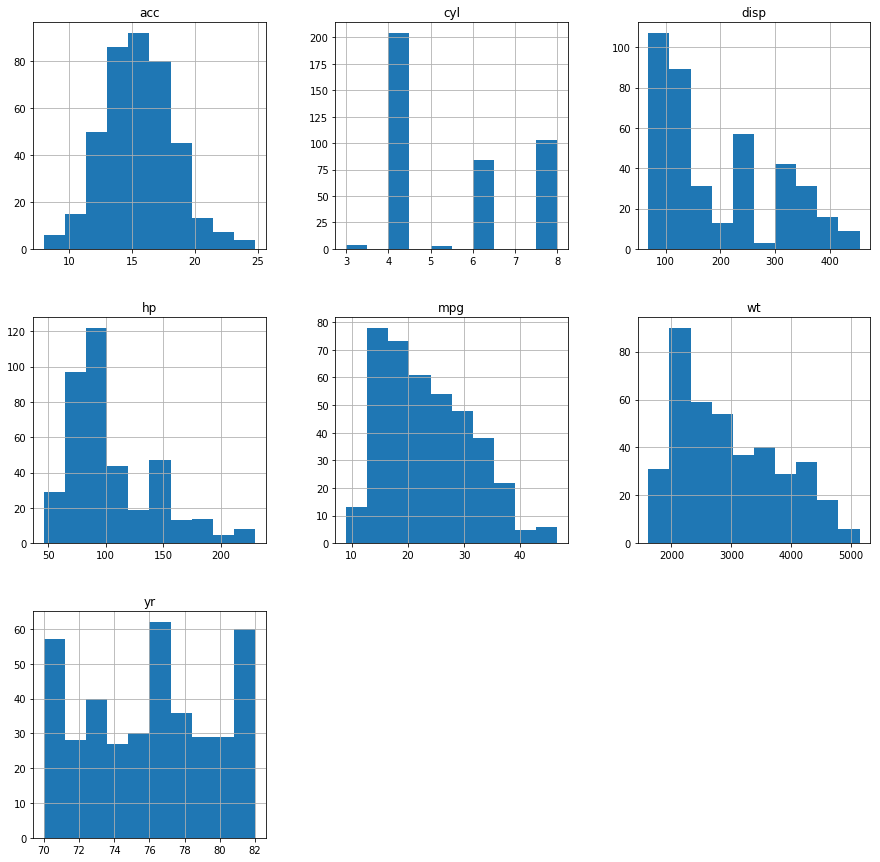

In [18]:
df[df.columns[0:7]].hist(figsize=[15,15])

<HTML>
    <FONT color = green>
        acc shows a normal distribution, maxing at around 15<br>
        Following histograms are right skewed<br>
        <ul>
            <li>disp</li>
            <li>hp</li>
            <li>mpg</li>
            <li>wt</li>
        </ul>
    </FONT>
</HTML>

<HTML>
    <FONT color = Darkblue>
        <b>Bivariat analysis: Correlation study</b><br>
    </FONT>
</HTML>

In [19]:
corr_df = df.corr()
corr_df

,cyl,disp,hp,wt,acc,yr,mpg,amc,audi,bmw,...,renault,saab,subaru,triumph,volvo,chevroelt_2,maxda_2,mercedes_2,toyota_2,volkswagen_2
cyl,1.000000,0.950721,0.843210,0.896017,-0.505419,-0.348746,-0.775396,0.146118,-0.092074,-0.060856,...,-0.096588,-0.086282,-0.086282,-0.042977,-0.057393,0.141445,-0.185580,-0.023329,-0.190476,-0.207135
disp,0.950721,1.000000,0.897377,0.932824,-0.543684,-0.370164,-0.804203,0.149917,-0.104803,-0.049425,...,-0.109640,-0.074187,-0.090635,-0.034423,-0.071193,0.151364,-0.178921,-0.023230,-0.207591,-0.228514
hp,0.843210,0.897377,1.000000,0.864464,-0.690732,-0.414405,-0.776157,0.064932,-0.060332,0.013864,...,-0.101172,0.012434,-0.080135,-0.020949,0.000489,0.080262,-0.121081,-0.036376,-0.138175,-0.251410
wt,0.896017,0.932824,0.864464,1.000000,-0.417457,-0.306564,-0.831741,0.100900,-0.065539,-0.046502,...,-0.119522,-0.041121,-0.098155,-0.027915,0.009105,0.133268,-0.153296,0.058002,-0.206735,-0.264435
acc,-0.505419,-0.543684,-0.690732,-0.417457,1.000000,0.288137,0.420289,-0.030344,0.018206,-0.075295,...,0.058642,-0.014381,0.049640,-0.008530,-0.000064,-0.022389,0.033518,0.125468,0.045150,0.161287
yr,-0.348746,-0.370164,-0.414405,-0.306564,0.288137,1.000000,0.579267,-0.128447,-0.010716,-0.048303,...,0.036345,-0.054842,0.054293,0.054224,-0.005920,-0.048692,0.130817,0.054826,0.024061,0.046978
mpg,-0.775396,-0.804203,-0.776157,-0.831741,0.420289,0.579267,1.000000,-0.185651,0.054845,0.002143,...,0.135325,0.004975,0.090488,0.073844,-0.038004,-0.141999,0.147804,0.005047,0.157509,0.258008
amc,0.146118,0.149917,0.064932,0.100900,-0.030344,-0.128447,-0.185651,1.000000,-0.036808,-0.019550,...,-0.031029,-0.027718,-0.027718,-0.013806,-0.034034,-0.096985,-0.048504,-0.023974,-0.072727,-0.066542
audi,-0.092074,-0.104803,-0.060332,-0.065539,0.018206,-0.010716,0.054845,-0.036808,1.000000,-0.009509,...,-0.015092,-0.013482,-0.013482,-0.006715,-0.016554,-0.047172,-0.023592,-0.011661,-0.035373,-0.032365
bmw,-0.060856,-0.049425,0.013864,-0.046502,-0.075295,-0.048303,0.002143,-0.019550,-0.009509,1.000000,...,-0.008016,-0.007161,-0.007161,-0.003567,-0.008792,-0.025055,-0.012530,-0.006193,-0.018788,-0.017190


In [20]:
# Define a function to find correlations higher than a given threshold
def correlationThresholdCutter(corr_data, threshold, targetLabel):
    #corr_threshold = 0.70;
    count = 0;
    if targetLabel == "":
        targetLabel == ""

    corr_threshold = threshold**2   # Square to get positive value for negative values as well
    count = 0

    for i in range(0, len(corr_data)):
        #for j in range(0, len(x_cor)):

        # X and Y axis columns are same. Limiting j to (i + 1) will only compare once between 2 columns.
        # Without this same columns will be compared twice.
        for j in range(0, i + 1):
            entry = corr_data.iloc[i, j]
            entry_squared = entry**2
            if(entry_squared >= corr_threshold):
                x_axis_col_lab = corr_data.index.values[i]
                y_axis_col_lab = corr_data.index.values[j]
                if x_axis_col_lab != y_axis_col_lab:
                    count = count + 1
                    if(x_axis_col_lab == targetLabel):
                        print("***", x_axis_col_lab, "*** corr with ", y_axis_col_lab, " is: ", entry)
                    elif y_axis_col_lab == targetLabel:
                        print(x_axis_col_lab, " corr with ***", y_axis_col_lab, "*** is: ", entry)
                    else:
                        print(x_axis_col_lab, " corr with ", y_axis_col_lab, " is: ", entry)
                    
    print("***")
    print("Number of relations with correlation higher than ", threshold, ": ", count)
    return


# Call the function

correlationThresholdCutter(corr_df, 0.50, "mpg")

disp  corr with  cyl  is:  0.9507213901392443
hp  corr with  cyl  is:  0.8432102831302849
hp  corr with  disp  is:  0.8973768447157525
wt  corr with  cyl  is:  0.8960167954533955
wt  corr with  disp  is:  0.9328241468416347
wt  corr with  hp  is:  0.8644643259955153
acc  corr with  cyl  is:  -0.5054194890521768
acc  corr with  disp  is:  -0.54368408350093
acc  corr with  hp  is:  -0.690732293005643
*** mpg *** corr with  cyl  is:  -0.7753962854205555
*** mpg *** corr with  disp  is:  -0.804202824805899
*** mpg *** corr with  hp  is:  -0.776157013133031
*** mpg *** corr with  wt  is:  -0.831740933244335
*** mpg *** corr with  yr  is:  0.5792671330833096
***
Number of relations with correlation higher than  0.5 :  14


<HTML>
    <FONT color = green>
        Following points, about the target column, can be deduced by studying the correlation values:<br>
        <ul>
            <li>mpg reduces with increase in cyl, disp, hp or wt</li>
            <li>mpg has improved with the yr, probably due to advancement of technology</li>
        </ul>
        <br>
        Following points, about non-target columns, can be deduced by the same study:<br>
        <ul>
            <li>cyl seems to show a direct relation to disp</li>
            <li>hp and wt seem to exhibit a direct relation to cyl and disp</li>
            <li>acc seems to exhibit an inverse relation to cyl and disp</li>
            <li>With increase in wt, hp is increasing.</li>
            <li>With increase in acc, hp decreases.</li>
            <li>Above 2 points mean that, in general with increase in wt, acc will decrease.</li>
        </ul>
    </FONT>
</HTML>

<HTML>
    <FONT color = Darkblue>
        <b>Bivariat analysis: Scatter plot</b><br>
    </FONT>
</HTML>

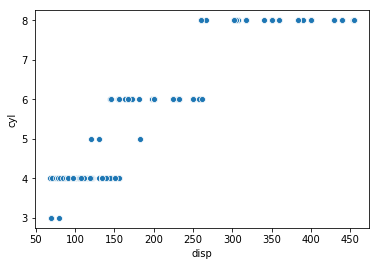

In [21]:
sns.scatterplot(df.disp, df.cyl)

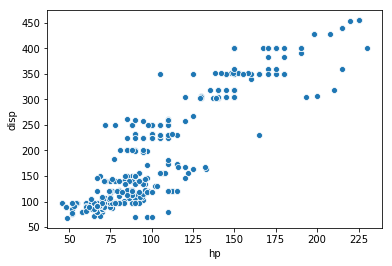

In [22]:
sns.scatterplot(df.hp, df.disp)

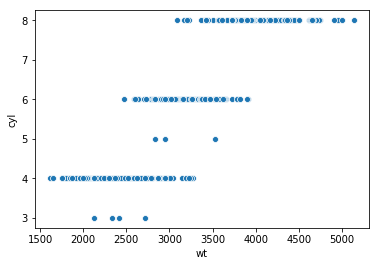

In [23]:
sns.scatterplot(df.wt, df.cyl)

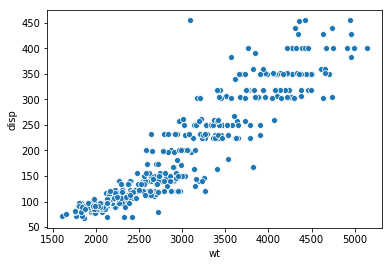

In [24]:
sns.scatterplot(df.wt, df.disp)

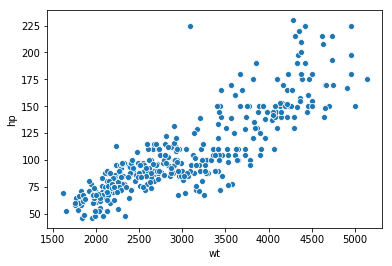

In [25]:
sns.scatterplot(df.wt, df.hp)

### STEP 2

- Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

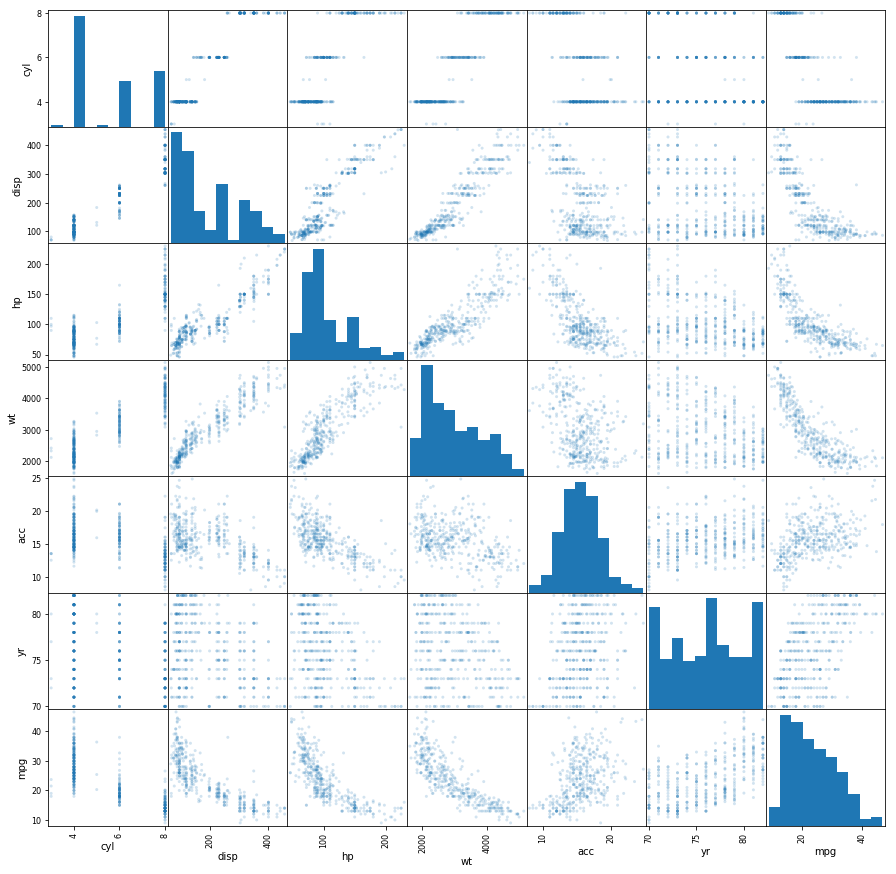

In [26]:
#from pandas.plotting import scatter_matrix

scatter_matrix(df[df.columns[0:7]], alpha=0.2, figsize=[15,15])
plt.show()

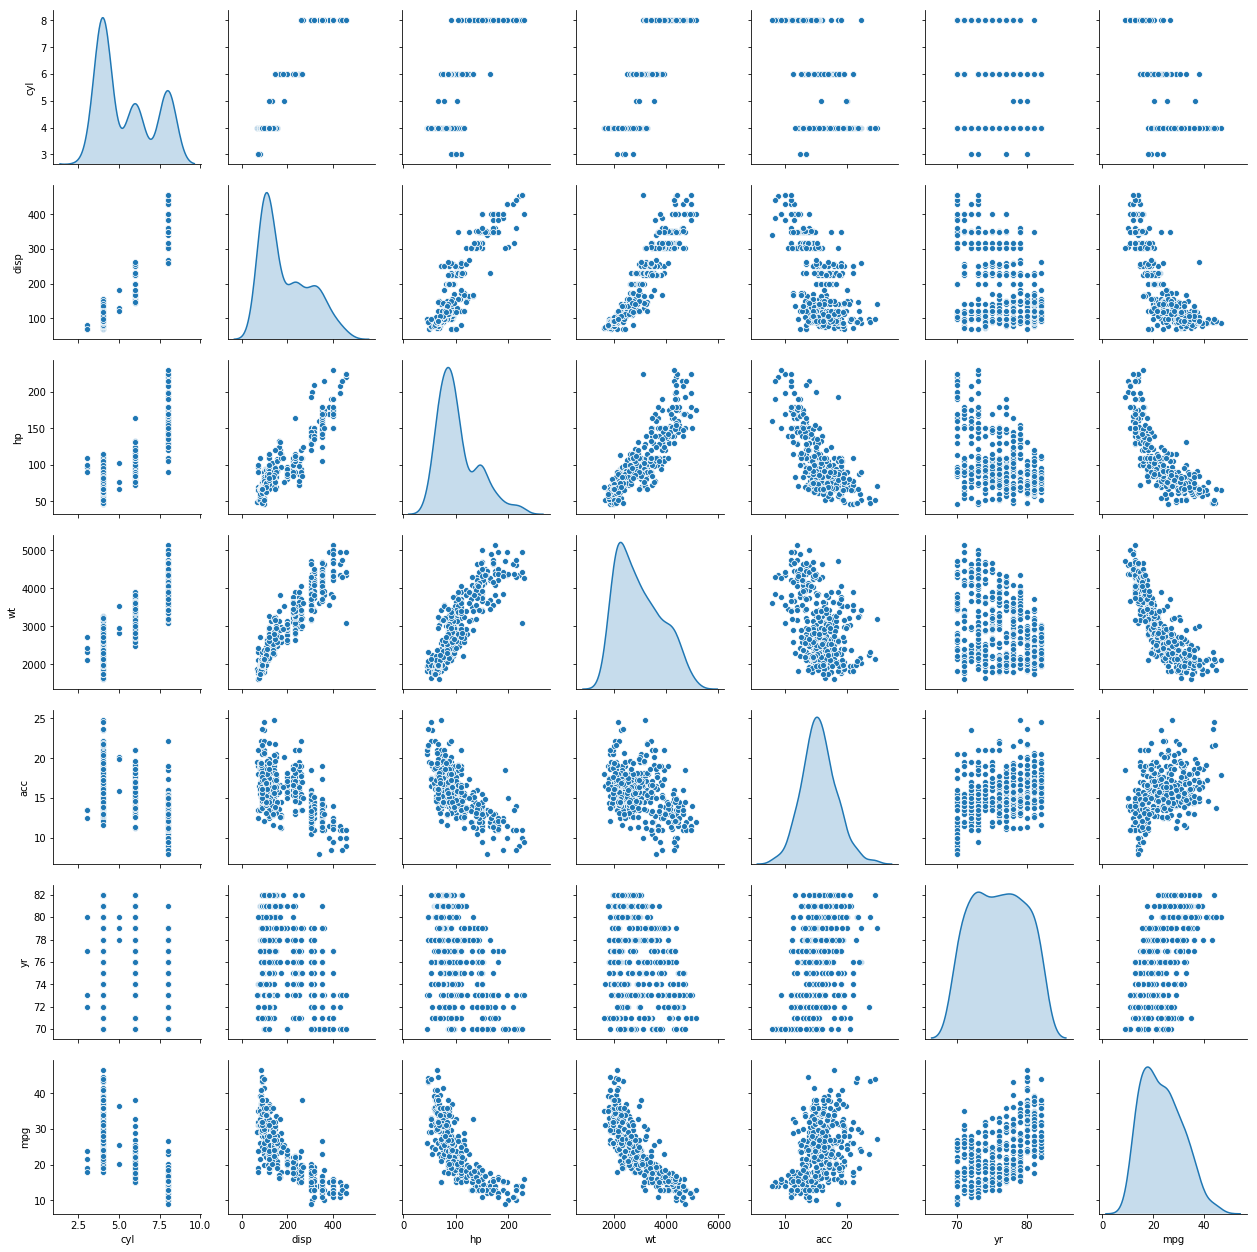

In [27]:
#sns.pairplot(df[df.columns[0:7]], diag_kind='kde' , hue = 'mpg')
sns.pairplot(df[df.columns[0:7]], diag_kind='kde')

<HTML>
    <FONT color = green>
        Following may be true about the clusters:<br>
        <ul>
            <li>3 natural clusters in cyl</li>
            <li>2 in hp</li>
        </ul>
    </FONT>
</HTML>

### STEP 3

- Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

In [28]:
# Fresh read and preprocess
df = pd.read_csv("cars-dataset.csv")
# In place of dummying, drop the "car name"
df.drop("car name", axis=1, inplace=True)
# Predict missing hp
df = hpPred(df)

# Create normalized values (except mpg)
y = df.mpg
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)
df.mpg = y

R squared for the linear regression:  0.9114879978864119
Adjusted R squared:  0.9094989641310504


D:\installationLocation\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [29]:
# from sklearn.cluster import KMeans
# from sklearn import metrics



k_range = range(2, 21)
cluster_errors = []
cluster_sil_scores = []

for k in k_range:
    clusters = KMeans(n_clusters=k, n_init=10)
    clusters.fit(df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)     # variance
    cluster_sil_scores.append(metrics.silhouette_score(df, labels, metric="euclidean"))
    # Silhouette score: Comparision of inter cluster distance (a) to nearest cluster distance (b)
    # Silhouette score = (b - a)/(larger of b or a)
    # Higher is better (-1 to +1)

#
cluster_df = pd.DataFrame({"NumberOfClusters": k_range, 
                           "ClusterError": cluster_errors, 
                           "Cluster_AverageSilhouetteScore": cluster_sil_scores})
cluster_df

,NumberOfClusters,ClusterError,Cluster_AverageSilhouetteScore
0,2,7288.913677,0.592570
1,3,3581.451122,0.551510
2,4,2308.013122,0.513903
3,5,1449.115609,0.524052
4,6,1128.037400,0.512451
5,7,867.950348,0.476483
6,8,695.671966,0.467887
7,9,582.409749,0.444297
8,10,490.145998,0.439692
9,11,432.830406,0.437474


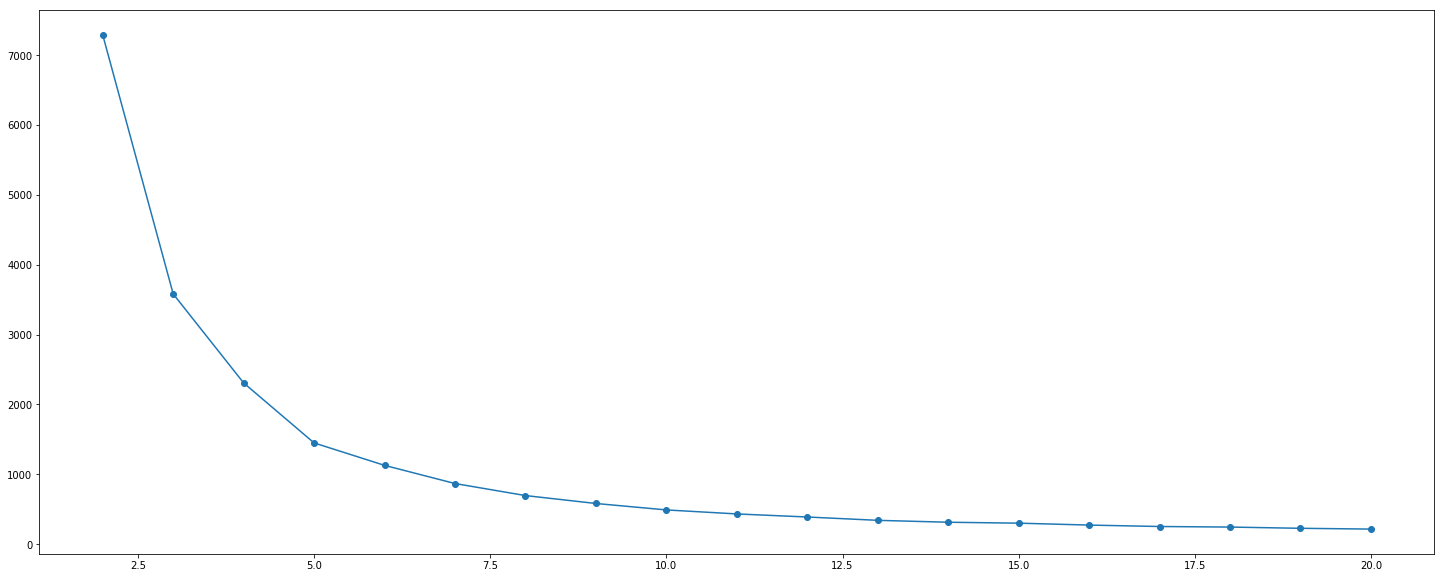

In [30]:
plt.figure(figsize=[25,10])
plt.plot(cluster_df.NumberOfClusters, cluster_df.ClusterError, marker="o")

<HTML>
    <FONT color = green>
        As per the elbow plot, the optimal value of clusters is 5<br>
    </FONT>
</HTML>

In [31]:
# 
#df = pd.read_csv("cars-dataset.csv")
#df.drop("car name", axis=1, inplace=True)
#df = hpPred(df)

#
#y = df.mpg
#min_max_scaler = preprocessing.MinMaxScaler()
#df_scaled = min_max_scaler.fit_transform(df)
#df = pd.DataFrame(df_scaled, columns=df.columns)
#df.mpg = y

In [32]:
# Create the optimal number of clusters
clusters = KMeans(n_clusters=5, n_init=10, random_state=0)
clusters.fit(df)

# Get centroid of each cluster
#centroids = clusters.cluster_centers_
#centroids_df = pd.DataFrame(centroids, columns=list(df))
#centroids_df

# Add a new column mentioning the cluster label
df["Cluster"] = clusters.labels_

# Check the number of data points in each cluster
(df.groupby(["Cluster"]).count()).cyl

Cluster
0     96
1     33
2     91
3     73
4    105
Name: cyl, dtype: int64

### STEP 4

- Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [33]:
# Check if 10% of records is higher than the number of columns in x
# If not, then increase the count by 5%
# Repeat untill the count is higher than number of columns in x

# NOTE: 
# Higher is the gap between the number-of-column and the count-in-test-set of records, better will be the adjusted-r2
# At (number_of_column - 1 = count_in_test_set), the adjusted-r2 will be infinite (because of division by 0)

# x
# startingPercent: Mimimum percent to start with
# jump: Jump to make if the count does not match
# columnTimesToCheck: It is the multiplication of number-of-columns in x that need to be checked against
def getPercentForTest(x, startingPercent, jump, columnTimesToCheck):
    columnCount = len(x.columns)
    for percent in range(startingPercent, 100, jump):
        testCount = round((percent/100)*len(x))
        if testCount > columnCount * columnTimesToCheck:
            #print("Total records: ", len(x))
            #print("Test split %: ", percent)
            return percent/100

#print(getPercentForTest(df, 1, 1))

In [34]:
# Write a function to return one model for each cluster



#from sklearn import preprocessing

def clusterWiseLinearModel(df_in, num_clusters, clusterLabel_column):
    for i in range(0, num_clusters):
        print("---***---")
        print("Linear regression for cluster ", i)
        
        # Get records belonging to the ith cluster
        df_i = df_in[df_in[clusterLabel_column]==i]
        
        # Create test and train data set for model building
        x = df_i.drop(["mpg", clusterLabel_column], axis=1)
        y = df_i.mpg
        # Apply standardization on x
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(x)
        x = pd.DataFrame(x_scaled)
        #
        test_percent = getPercentForTest(x, 1, 1, 2)
        print("test_percent: ", test_percent)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_percent, random_state=0)
        
        # Build the model to predict mpg
        regr = linear_model.LinearRegression()
        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        # r-squared
        r2 = r2_score(y_test, y_pred)
        #r2_ = regr.score(x_test, y_test)
        # Adjusted r-squared
        ad_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - len(x_test.columns) - 1)
        #ad_r2_ = 1 - (1-r2)*(len(X_train) - 1) / (len(X_train_scaled) - (X_train_scaled.shape[1] - 1) - 1)
        
        print("R squared         : ", r2)
        #print("r2_: ", r2_)
        print("Adjusted R squared: ", ad_r2)
        y_df = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
        print(y_df)

In [35]:
num_clusters = 4

clusterWiseLinearModel(df, num_clusters, "Cluster")

---***---
Linear regression for cluster  0
test_percent:  0.14
R squared         :  -0.15197865942344224
Adjusted R squared:  -1.1393889389292498
     y_test     y_pred
118    24.0  24.671371
362    24.2  25.027971
19     26.0  24.122377
219    25.5  24.954917
299    27.2  25.288756
341    23.5  25.969223
58     25.0  25.217454
338    27.2  25.673357
206    26.5  25.780970
297    25.4  25.322616
205    28.0  25.791514
372    27.0  25.862471
307    26.8  25.627981
55     27.0  25.141322
---***---
Linear regression for cluster  1
test_percent:  0.38
R squared         :  0.0034124158278888705
Adjusted R squared:  -0.9931751683442223
     y_test     y_pred
322    46.6  39.221326
347    37.0  39.089107
378    38.0  39.484647
330    40.9  39.602270
245    36.1  40.292172
379    36.0  38.355061
380    36.0  37.484301
329    44.6  39.417488
320    37.0  38.141459
394    44.0  37.424773
385    38.0  38.671040
376    37.0  38.075965
327    36.4  38.212592
---***---
Linear regression for cluster 

In [ ]:
# Apply KMeans around each cluster, if time permits